<a href="https://colab.research.google.com/github/AdamZ0112358/values-fifa/blob/main/analysis/Analiza1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from matplotlib.widgets import Lasso
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format


# Data loading and merging

Final merging of datasets using previously developed keys

In [327]:
df = pd.read_excel(r'/content/drive/MyDrive/ColabNotebooks/mylib/final_df8.xlsx', index_col=(0))

In [328]:
df.head()

,klub,pilkarz,pozycja,data_urodzenia,wzrost,dominujaca_noga,kontrakt_od,kontrakt_do,wartosc_eur,liga,wiek,tf_klucz,ws_klucz,tf_klucz2,final_klucz,sf_unique_x
0,West Ham United,Aaron Cresswell,Lewy obrońca,15 gru 1989 (33),"1,70m",lewonożny,3 lip 2014,30 cze 2023,2500000.0,premier league,33,Cresswell33West Ham United,Cresswell33West Ham United,Cresswell (West Ham United),Cresswell (West Ham United),Aaron Cresswell32
1,FC Brentford,Aaron Hickey,Lewy obrońca,10 cze 2002 (20),"1,85m",obunożny,9 lip 2022,30 cze 2026,18000000.0,premier league,20,Hickey20FC Brentford,Hickey20FC Brentford,Hickey (FC Brentford),Hickey (FC Brentford),Aaron Hickey20
2,FC Arsenal,Aaron Ramsdale,Bramkarz,14 maj 1998 (24),"1,90m",prawonożny,20 sie 2021,30 cze 2025,30000000.0,premier league,24,Ramsdale24FC Arsenal,Ramsdale24FC Arsenal,Ramsdale (FC Arsenal),Ramsdale (FC Arsenal),Aaron Ramsdale24
3,OGC Nice,Aaron Ramsey,Środkowy pomocnik,26 gru 1990 (32),"1,78m",prawonożny,1 sie 2022,30 cze 2023,3000000.0,ligue 1,32,Ramsey32OGC Nice,Ramsey32OGC Nice,Ramsey (OGC Nice),Ramsey (OGC Nice),Aaron Ramsey31
4,Manchester United,Aaron Wan-Bissaka,Prawy obrońca,26 lis 1997 (25),"1,83m",prawonożny,1 lip 2019,30 cze 2024,18000000.0,premier league,25,Wan-Bissaka25Manchester United,Wan-Bissaka25Manchester United,Wan-Bissaka (Manchester United),Wan-Bissaka (Manchester United),Aaron Wan-Bissaka24


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3126 entries, 0 to 3125
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   klub             3126 non-null   object
 1   pilkarz          3126 non-null   object
 2   pozycja          3126 non-null   object
 3   data_urodzenia   3126 non-null   object
 4   wzrost           3126 non-null   object
 5   dominujaca_noga  3126 non-null   object
 6   kontrakt_od      3126 non-null   object
 7   kontrakt_do      3126 non-null   object
 8   wartosc_eur      3126 non-null   object
 9   liga             3126 non-null   object
 10  wiek             3126 non-null   int64 
 11  tf_klucz         3126 non-null   object
 12  ws_klucz         2524 non-null   object
 13  tf_klucz2        3126 non-null   object
 14  final_klucz      2933 non-null   object
 15  sf_unique_x      2933 non-null   object
dtypes: int64(1), object(15)
memory usage: 415.2+ KB


In [330]:
sofifa_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/mylib/sf_df8.csv", index_col=(0))

In [331]:
df = pd.merge(df, sofifa_df, left_on=("sf_unique_x"), right_on=("sf_unique"), how="left")


In [332]:
df = df.drop(['tf_klucz', 'final_klucz', 'tf_klucz2','sf_unique_x', 'slownik_klub2', 'sf_klucz',
                    'sf_klucz2', 'sf_unique'], axis = 1)

In [333]:
ws_df = pd.read_excel("/content/drive/MyDrive/ColabNotebooks/mylib/ws5_df.xlsx", index_col=(0))

In [334]:
df = pd.merge(df, ws_df[{"ws_wystepy", "ws_minuty", "ws_bramki", "ws_asysty", "ws_skutecznosc_podan",
                        "ws_wygrane_pojedynki_na_mecz", "ws_MotM", "ws_srednia_ocena", "ws_klucz" }],
              left_on=("ws_klucz"), right_on=("ws_klucz"), how="left")

<ipython-input-334-cdc8d39347f3>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = pd.merge(df, ws_df[{"ws_wystepy", "ws_minuty", "ws_bramki", "ws_asysty", "ws_skutecznosc_podan",


# Explanatory Data Analysis

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3126 entries, 0 to 3125
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   klub                          3126 non-null   object 
 1   pilkarz                       3126 non-null   object 
 2   pozycja                       3126 non-null   object 
 3   data_urodzenia                3126 non-null   object 
 4   wzrost                        3126 non-null   object 
 5   dominujaca_noga               3126 non-null   object 
 6   kontrakt_od                   3126 non-null   object 
 7   kontrakt_do                   3126 non-null   object 
 8   wartosc_eur                   3126 non-null   object 
 9   liga                          3126 non-null   object 
 10  wiek                          3126 non-null   int64  
 11  ws_klucz                      2524 non-null   object 
 12  NAME                          2933 non-null   object 
 13  POS

In [336]:
ws_nan = df[df["ws_klucz"].isna()] #602 rows don't have data from who_scored
both_nan = ws_nan[ws_nan["NAME"].isna()] #136 rows have no data from both who_scored and sofifa

nan_rozlaczne = 602+193-136
utrata_danych2 = nan_rozlaczne/df['pilkarz'].count()
print(utrata_danych2) # If I wanted to throw away all the nulls I would get rid of 21% of the data

0.2108125399872041


In [337]:
df = df.drop(['ws_klucz'], axis = 1)

In [338]:
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data["Total"]>0])

                              Total  Percent
ws_MotM                         602     0.19
ws_bramki                       602     0.19
ws_srednia_ocena                602     0.19
ws_wygrane_pojedynki_na_mecz    602     0.19
ws_skutecznosc_podan            602     0.19
ws_asysty                       602     0.19
ws_wystepy                      602     0.19
ws_minuty                       602     0.19
DEF                             193     0.06
PAC                             193     0.06
SHO                             193     0.06
PAS                             193     0.06
DRI                             193     0.06
VALUE_EUR                       193     0.06
PHY                             193     0.06
FULL_NAME                       193     0.06
AGE                             193     0.06
DEFENDING                       193     0.06
SALARY_EUR                      193     0.06
TOTAL                           193     0.06
MENTALITY                       193     0.06
NAME      

In [339]:
df.describe()

,wiek,OVA,POT,ATTACKING,SKILL,MOVEMENT,POWER,MENTALITY,DEFENDING,TOTAL,PAC,SHO,PAS,DRI,DEF,PHY,AGE,VALUE_EUR,SALARY_EUR,ws_minuty,ws_srednia_ocena
count,"3,126.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,524.00","2,524.00"
mean,25.80,73.13,77.65,278.36,290.96,333.51,318.39,283.10,159.28,"1,750.11",70.36,60.13,65.40,70.24,56.71,68.87,25.44,"10,521,244.46","44,184.79",727.96,6.53
std,4.56,6.31,5.26,83.32,86.36,58.87,53.20,72.69,68.74,292.22,10.98,14.31,9.44,9.01,17.93,9.35,4.52,"16,042,937.99","99,050.56",481.87,0.33
min,16.00,48.00,58.00,45.00,55.00,132.00,144.00,65.00,23.00,806.00,30.00,22.00,31.00,36.00,16.00,30.00,16.00,0.00,"1,000.00",1.00,5.66
25%,22.00,69.00,74.00,254.00,261.00,302.00,289.00,260.00,95.00,"1,622.00",64.00,50.00,59.00,65.00,41.00,63.00,22.00,"1,900,000.00","8,000.00",289.00,6.29
50%,25.00,74.00,78.00,299.00,311.00,344.00,328.00,298.00,188.00,"1,804.00",71.00,63.00,66.00,71.00,62.00,70.00,25.00,"4,100,000.00","21,000.00",710.50,6.51
75%,29.00,77.00,81.00,334.00,349.00,375.00,357.00,331.00,217.00,"1,949.00",78.00,71.00,72.00,76.00,72.00,76.00,29.00,"12,000,000.00","42,000.00","1,116.00",6.72
max,41.00,91.00,95.00,434.00,464.00,461.00,432.00,414.00,268.00,"2,312.00",97.00,91.00,93.00,94.00,90.00,90.00,41.00,"190,500,000.00","950,000.00","1,798.00",8.45


In [340]:
df[df.columns[df.dtypes == object]].describe()


,klub,pilkarz,pozycja,data_urodzenia,wzrost,dominujaca_noga,kontrakt_od,kontrakt_do,wartosc_eur,liga,NAME,POSITIONS,TEAM,CONTRACT_LENGTH,FULL_NAME,ws_wystepy,ws_asysty,ws_skutecznosc_podan,ws_wygrane_pojedynki_na_mecz,ws_bramki,ws_MotM
count,3126,3126,3126,3126,3126,3126,3126,3126,3126,3126,2933,2933,2933,2933,2933,2524,2524,2524,2524,2524,2524
unique,116,3106,13,2404,41,4,576,14,104,6,2901,328,116,78,2933,193,11,416,51,16,7
top,AC Monza,Antony,Środkowy obrońca,9 lut 1995 (27),"1,85m",prawonożny,1 lip 2022,30 cze 2023,3000000.0,serie a,M. Camara,CB,Monza,"Jun 30, 2023",Aaron Cresswell,15,-,80,-,-,-
freq,36,2,555,5,216,2166,442,856,156,582,3,423,33,230,1,90,1598,30,280,1512,1902


In [341]:
df_copy1 = df.copy()
df = df_copy1

## Value - target variable

In [342]:
df['wartosc_eur'] = df['wartosc_eur'].astype("string")
df['wartosc_eur'] = df['wartosc_eur'].str.replace('-','0')
df['wartosc_eur'] = df["wartosc_eur"].astype("float")
df["wartosc_eur"].describe()
#75% of the analyzed players are cheaper than 1 million eur
# The average price is 8.9 million eur

count         3,126.00
mean      8,938,515.67
std      14,635,060.56
min               0.00
25%       1,000,000.00
50%       3,000,000.00
75%      10,000,000.00
max     180,000,000.00
Name: wartosc_eur, dtype: float64

75% of the analyzed players are cheaper than 1 million eur,
The average price is 8.9 million eur





<ipython-input-355-5eb284b156c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['wartosc_eur'])


<Axes: xlabel='wartosc_eur', ylabel='Density'>

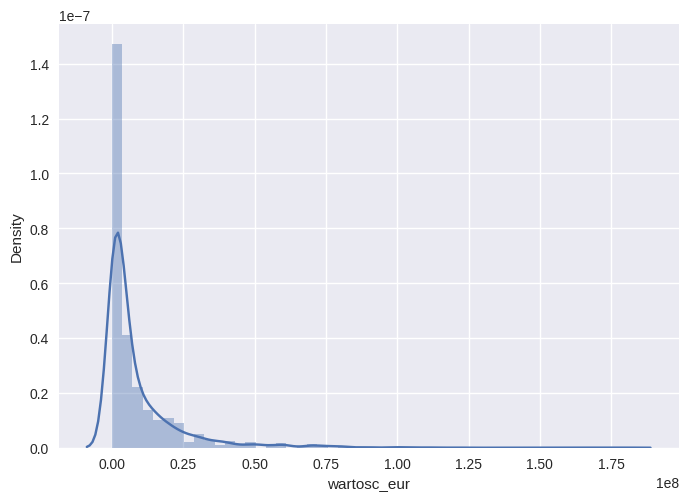

In [355]:
sns.distplot(df['wartosc_eur'])

In [344]:
#kurtosis and skewness
print("skewness: %f" % df['wartosc_eur'].skew()) #3.6
print("kurtosis: %f" % df['wartosc_eur'].kurt()) #20.2

#High values of Skewness and Kurtosis indicate that the data is not symmetrical,
#A positive value indicates that the magnitude of the right tail is significant.
#We significant have outliers

skewness: 3.640233
kurtosis: 20.241342


In [345]:
def test(aau):
    print(f"Wartość skośności to: {aau.skew():.2f}")

test(df["wartosc_eur"])

Wartość skośności to: 3.64


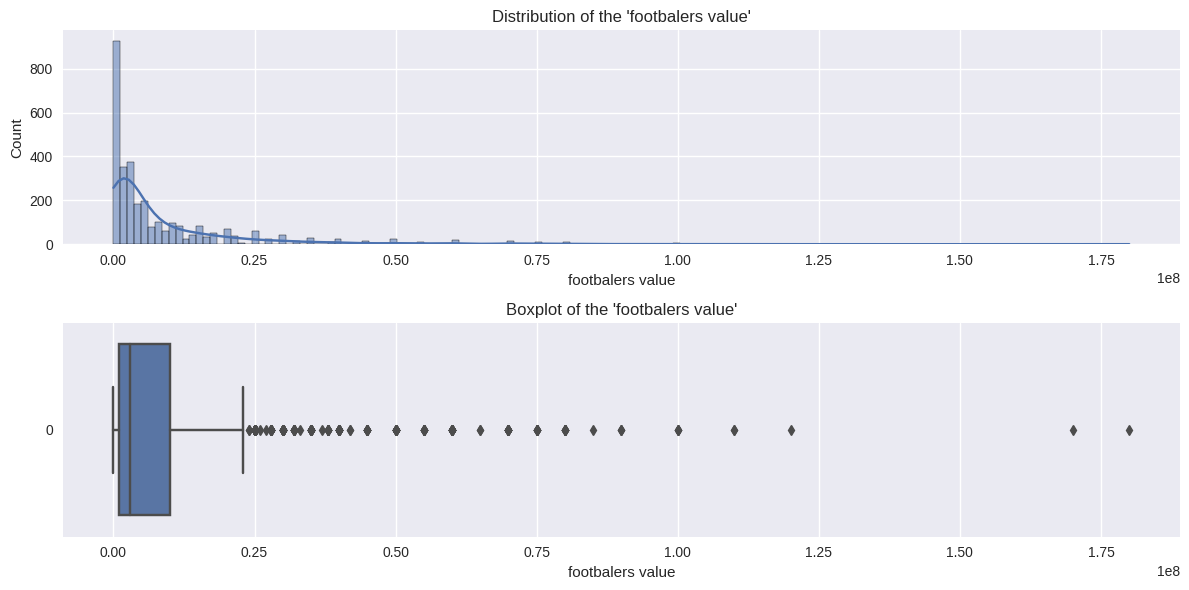

skewness: 3.64
kurtosis: 20.24


count         3,126.00
mean      8,938,515.67
std      14,635,060.56
min               0.00
25%       1,000,000.00
50%       3,000,000.00
75%      10,000,000.00
max     180,000,000.00
Name: wartosc_eur, dtype: float64

In [354]:
def plots_stats(col, name):
    fig, axs = plt.subplots(2, 1, figsize=(12,6))

    #(displot)
    sns.histplot(col, ax=axs[0], kde=True)
    axs[0].set_xlabel(name)
    axs[0].set_title("Distribution of the '" + name + "'")


    #(boxplot)
    sns.boxplot(col, ax=axs[1], orient='h')
    axs[1].set_xlabel(name)
    axs[1].set_title("Boxplot of the '" + name + "'")

    plt.tight_layout()
    plt.show()

    print(f"skewness: {col.skew():.2f}")
    print(f"kurtosis: {col.kurt():.2f}")

    display(col.describe())



plots_stats(df["wartosc_eur"], "footbalers value")

<ipython-input-157-532eaa805acc>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
<ipython-input-157-532eaa805acc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price_range"] = price_range


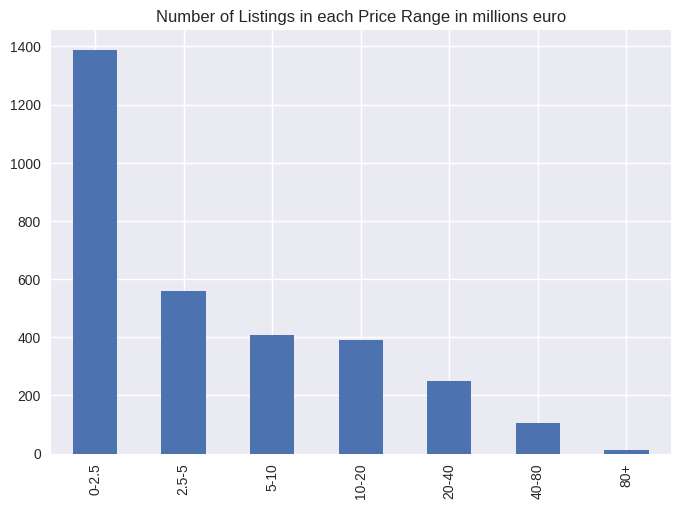

In [157]:
plt.style.use("seaborn")
price_range = pd.cut(df["wartosc_eur"],
                     bins=[0, 2500000, 5000000, 10000000, 20000000, 40000000, 80000000, df["wartosc_eur"].max()],
                     labels=["0-2.5", "2.5-5", "5-10", "10-20", "20-40", "40-80", "80+"])
df["price_range"] = price_range
df["price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price Range in millions euro")
plt.show()


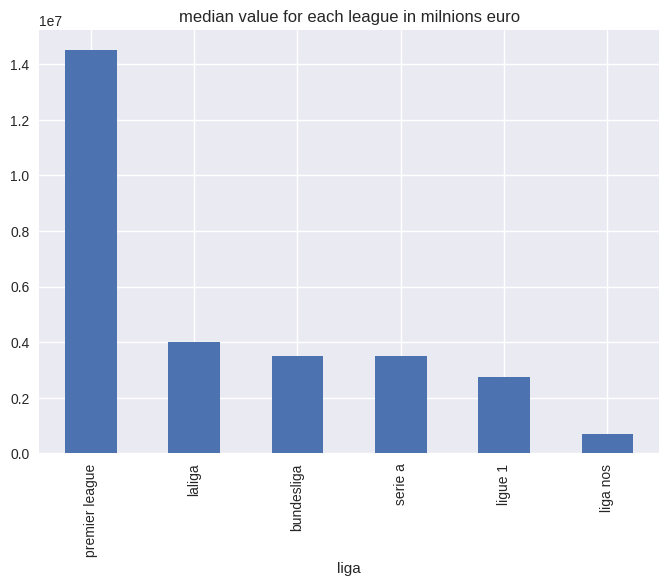

In [158]:
#I am using the median because I have outliers, and I can't remove them, because the purpose of the exercise is, among other things, to find them
#you can see the disparity of values depending on the league
league_md_price = df.groupby(['liga'])['wartosc_eur'].median().sort_values(ascending=False)
league_md_price.plot(kind="bar")
plt.title("median value for each league in milnions euro")
plt.show()

In [132]:
#The 10 most expensive players
top10 = df[["pilkarz", "wartosc_eur", "klub", "VALUE_EUR"]].sort_values(by="wartosc_eur", ascending=False).head(10)
top10 = top10.reset_index(drop=True)
top10.index = top10.index + 1
print(top10)

              pilkarz    wartosc_eur                    klub      VALUE_EUR
1       Kylian Mbappe 180,000,000.00  FC Paris Saint-Germain 190,500,000.00
2      Erling Haaland 170,000,000.00         Manchester City 160,000,000.00
3     Vinicius Junior 120,000,000.00             Real Madryt 109,000,000.00
4     Jude Bellingham 110,000,000.00       Borussia Dortmund  81,500,000.00
5          Phil Foden 110,000,000.00         Manchester City 109,500,000.00
6   Federico Valverde 100,000,000.00             Real Madryt  81,000,000.00
7       Jamal Musiala 100,000,000.00        Bayern Monachium  78,500,000.00
8         Bukayo Saka 100,000,000.00              FC Arsenal  72,000,000.00
9               Pedri 100,000,000.00            FC Barcelona 104,500,000.00
10               Gavi  90,000,000.00            FC Barcelona  39,000,000.00


In [133]:
#The 10 most expensive but values from fifa
top10 = df[["pilkarz", "VALUE_EUR", "klub", "wartosc_eur"]].sort_values(by="VALUE_EUR", ascending=False).head(10)
top10 = top10.reset_index(drop=True)
top10.index = top10.index + 1
print(top10)

            pilkarz      VALUE_EUR                    klub    wartosc_eur
1     Kylian Mbappe 190,500,000.00  FC Paris Saint-Germain 180,000,000.00
2    Erling Haaland 160,000,000.00         Manchester City 170,000,000.00
3   Frenkie de Jong 116,500,000.00            FC Barcelona  50,000,000.00
4     Mohamed Salah 115,500,000.00            FC Liverpool  80,000,000.00
5        Phil Foden 109,500,000.00         Manchester City 110,000,000.00
6   Vinicius Junior 109,000,000.00             Real Madryt 120,000,000.00
7        Ruben Dias 107,500,000.00         Manchester City  75,000,000.00
8   Kevin De Bruyne 107,500,000.00         Manchester City  80,000,000.00
9        Harry Kane 105,500,000.00       Tottenham Hotspur  90,000,000.00
10   Joshua Kimmich 105,500,000.00        Bayern Monachium  80,000,000.00


In [134]:
#The 10 best rated footballers from fifa
top10 = df[["pilkarz", "OVA", "klub"]].sort_values(by="OVA", ascending=False).head(10)
top10 = top10.reset_index(drop=True)
top10.index = top10.index + 1
print(top10)

               pilkarz   OVA                    klub
1        Kylian Mbappe 91.00  FC Paris Saint-Germain
2        Karim Benzema 91.00             Real Madryt
3         Lionel Messi 91.00  FC Paris Saint-Germain
4   Robert Lewandowski 91.00            FC Barcelona
5      Kevin De Bruyne 91.00         Manchester City
6        Mohamed Salah 90.00            FC Liverpool
7     Thibaut Courtois 90.00             Real Madryt
8           Harry Kane 89.00       Tottenham Hotspur
9         Manuel Neuer 89.00        Bayern Monachium
10            Casemiro 89.00       Manchester United


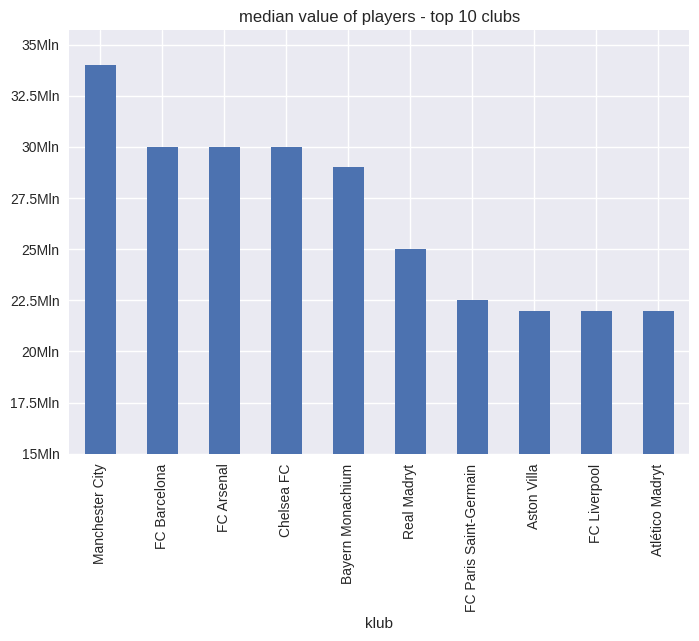

In [135]:
club_median_price = df.groupby(['klub'])['wartosc_eur'].median().sort_values(ascending=False).head(10)
ax = club_median_price.plot.bar(x='klub', y='wartosc_eur')
ax.set_title("median value of players - top 10 clubs")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,g}'.format(y/1000000) + 'Mln'))
ax.set_ybound(lower=15000000, upper=None)
plt.show()

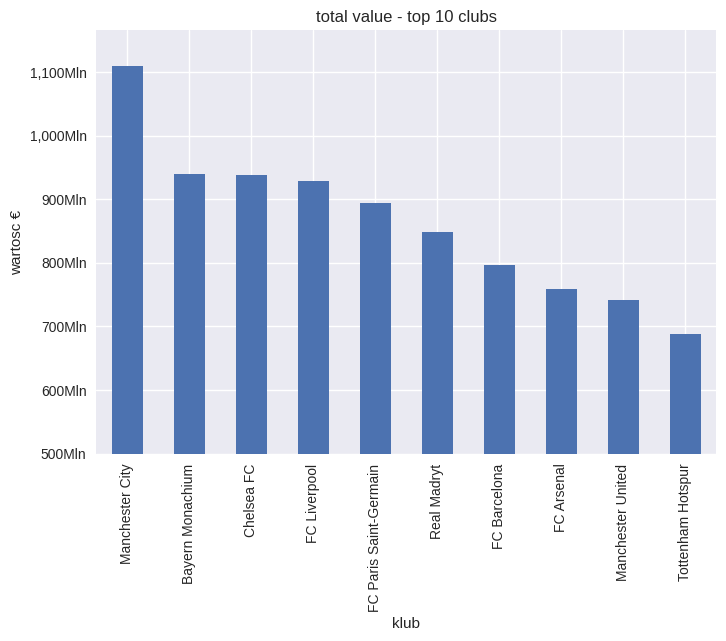

In [136]:
club_sum_price = df.groupby(['klub'])['wartosc_eur'].sum().sort_values(ascending=False).head(10)
ax = club_sum_price.plot.bar(x='klub', y='wartosc_eur')
ax.set_title("total value - top 10 clubs")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,g}'.format(y/1000000) + 'Mln'))
ax.set_ybound(lower=500000000, upper=None)
ax.set_ylabel("wartosc €", fontdict=None, labelpad=None)
plt.show()

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3126 entries, 0 to 3125
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   klub                          3126 non-null   object  
 1   pilkarz                       3126 non-null   object  
 2   pozycja                       3126 non-null   object  
 3   wzrost                        3126 non-null   float64 
 4   dominujaca_noga               3126 non-null   object  
 5   wartosc_eur                   3126 non-null   float64 
 6   liga                          3126 non-null   object  
 7   wiek                          3126 non-null   int64   
 8   OVA                           2933 non-null   float64 
 9   POT                           2933 non-null   float64 
 10  ATTACKING                     2933 non-null   float64 
 11  SKILL                         2933 non-null   float64 
 12  MOVEMENT                      2933 non-null   fl

## height

In [122]:
df['wzrost'] = df['wzrost'].str.replace(',','')
df['wzrost'] = df['wzrost'].str.replace('m','')
df['wzrost'] = df['wzrost'].str.replace('-','0')
df['wzrost'] = df['wzrost'].astype(float)

In [123]:
#removing unnecessary columns, including duplicate columns
df = df.drop(['data_urodzenia', 'kontrakt_od', 'kontrakt_do',
              'NAME', 'TEAM', 'CONTRACT_LENGTH', 'FULL_NAME', 'AGE'], axis = 1)

In [124]:
df_copy2 = df.copy()
df = df_copy2

## positions

In [119]:
#comparison of POSITIONS and pozycja columns, "pozycja" seems better.
df["POSITIONS"].unique()

array(['LB CB ', 'RB LB RWB ', 'GK ', 'CM CAM ', 'RB ', 'LB LM ', nan,
       'CDM CM ', 'RM ST ', 'LM RM LW ', 'CAM CM LM ', 'CB LB ',
       'CDM CM RM ', 'RB RWB LB ', 'CM CDM ', 'LWB LB ', 'CB ', 'ST LM ',
       'ST ', 'RB RWB ', 'LW ST CAM ', 'CAM LM ST ', 'CM CF CDM ',
       'LB RB ', 'LWB LM LB ', 'RW ST RM ', 'LM RM ', 'LM CAM CM ',
       'RW LW ', 'ST LW ', 'CB CDM ', 'CM LM ', 'LB ', 'ST RM ',
       'RM LM ST ', 'LB LWB ', 'LB RB LWB ', 'ST CAM CM ', 'RWB CM RB ',
       'RM LM RB ', 'CM RM CF ', 'ST CAM ', 'RM ', 'CF LM ', 'RM RB ',
       'CAM ', 'LB LM RB ', 'LW LM ', 'LB LWB LM ', 'RB RM RWB ',
       'LM RM CAM ', 'CF CAM ', 'CM ', 'LW ', 'CB RB ', 'CAM CM RM ',
       'CM RW CDM ', 'RB RM ', 'CB RB CDM ', 'ST CF ', 'LM ST ',
       'CDM CM CB ', 'CM LM LW ', 'RM LM CAM ', 'RW RM ', 'CB RB LB ',
       'LM LW ', 'CB RWB ', 'CM CDM RM ', 'LM ST RM ', 'LM CAM ',
       'LW RW ', 'LWB LM RWB ', 'RWB RB ', 'CAM CM ', 'ST RW LW ', 'CDM ',
       'ST RM CAM ', 'LWB LM ', '

In [120]:
df["pozycja"].unique()

array(['Lewy obrońca', 'Bramkarz', 'Środkowy pomocnik', 'Prawy obrońca',
       'Prawy napastnik', 'Lewy napastnik', 'Ofensywny pomocnik',
       'Środkowy obrońca', 'Defensywny pomocnik', 'Środkowy napastnik',
       'Prawy pomocnik', 'Cofnięty napastnik', 'Lewy pomocnik'],
      dtype=object)

In [121]:
df = df.drop(['POSITIONS'], axis = 1)

<Axes: title={'center': 'distribution of players in relation to their position on the pitch'}, ylabel='pozycja'>

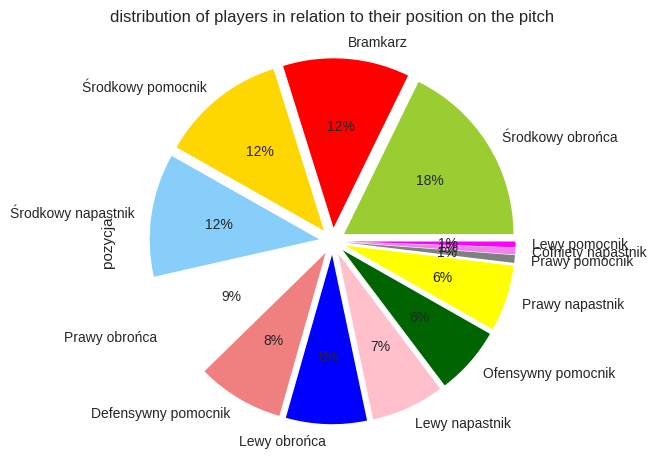

In [131]:
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue',
          'white','lightcoral','blue','pink', 'darkgreen',
          'yellow','grey','violet','magenta']
explode = (0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08)
df.pozycja.value_counts().plot(title = "distribution of players in relation to their position on the pitch",
                               kind='pie', autopct='%1.0f%%', explode = explode, colors=colors)


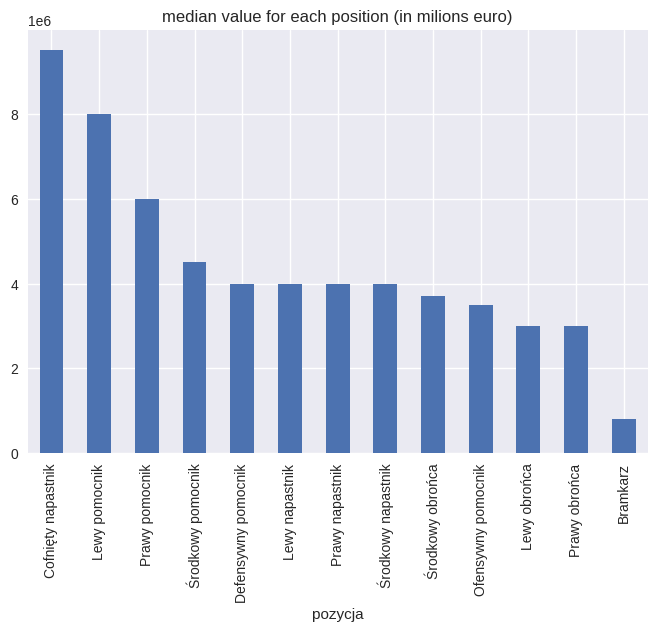

In [159]:
#we can see the disparity in value by position, from forwards and wingers to defense
position_md_price = (df.groupby(['pozycja'])['wartosc_eur'].median()).sort_values(ascending=False)
position_md_price.plot(kind="bar")
plt.title("median value for each position (in milions euro)")
plt.show()


## ws_columns

<ipython-input-138-85ae9a378924>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ws_srednia_ocena'])


<Axes: xlabel='ws_srednia_ocena', ylabel='Density'>

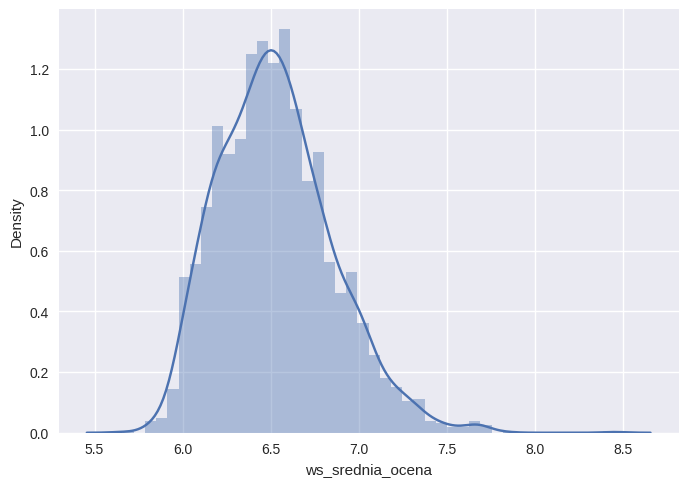

In [138]:
sns.distplot(df['ws_srednia_ocena'])

In [139]:
df.groupby(["klub", "pozycja"])["ws_srednia_ocena"].median()

klub                     pozycja            
1.FC Köln                Bramkarz              6.26
                         Defensywny pomocnik   6.75
                         Lewy napastnik        7.06
                         Lewy obrońca          6.70
                         Ofensywny pomocnik    6.21
                                               ... 
Wolverhampton Wanderers  Prawy napastnik       6.60
                         Prawy obrońca         6.43
                         Środkowy napastnik    6.26
                         Środkowy obrońca      6.59
                         Środkowy pomocnik     6.50
Name: ws_srednia_ocena, Length: 1153, dtype: float64

<ipython-input-140-597dc04926cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ws_minuty'])


<Axes: xlabel='ws_minuty', ylabel='Density'>

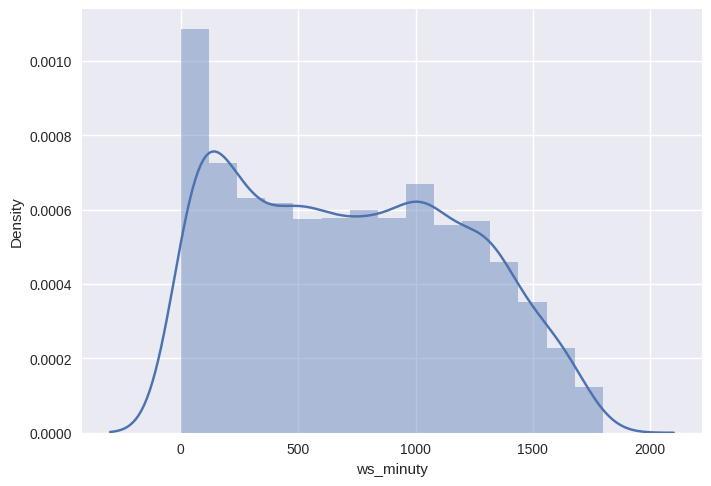

In [140]:
sns.distplot(df['ws_minuty'])

In [114]:
df["wystepy_lawka"] = df["ws_wystepy"].str.replace(')','').str.partition('(')[2]
df["ws_wystepy_poczatek"] = df["ws_wystepy"].str.replace(')','').str.partition('(')[0].astype(float)


<ipython-input-114-58fb6f877245>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["wystepy_lawka"] = df["ws_wystepy"].str.replace(')','').str.partition('(')[2]
<ipython-input-114-58fb6f877245>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["ws_wystepy_poczatek"] = df["ws_wystepy"].str.replace(')','').str.partition('(')[0].astype(float)


In [115]:
#byly problemy z ustawieniem typy jako float
def convert_float(val):
    try:
        return float(val)
    except ValueError:
        return 0

df["wystepy_lawka"] = df.wystepy_lawka.apply(lambda x: convert_float(x))

In [117]:
df = df.drop([ 'ws_wystepy' ], axis = 1)


In [186]:
df["wystepy_suma"] = df["wystepy_lawka"] + df["ws_wystepy_poczatek"]

df[df["wystepy_suma"].isna()]

<ipython-input-186-0d7fc019af34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["wystepy_suma"] = df["wystepy_lawka"] + df["ws_wystepy_poczatek"]


,klub,pilkarz,pozycja,wzrost,dominujaca_noga,wartosc_eur,liga,wiek,OVA,POT,ATTACKING,SKILL,MOVEMENT,POWER,MENTALITY,DEFENDING,TOTAL,PAC,SHO,PAS,DRI,DEF,PHY,VALUE_EUR,SALARY_EUR,ws_minuty,ws_asysty,ws_skutecznosc_podan,ws_wygrane_pojedynki_na_mecz,ws_srednia_ocena,ws_bramki,ws_MotM,wystepy_lawka,ws_wystepy_poczatek,wystepy_suma,price_range,wartosc_log,wartosc_log_fifa
5,FC Augsburg,Aaron Zehnter,Lewy obrońca,180.00,lewonożny,"300,000.00",bundesliga,18,60.00,81.00,235.00,274.00,307.00,240.00,250.00,172.00,"1,541.00",62.00,36.00,54.00,59.00,57.00,55.00,"750,000.00","500,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2.5,12.61,13.53
15,Borussia Dortmund,Abdoulaye Kamara,Defensywny pomocnik,183.00,prawonożny,"1,000,000.00",bundesliga,18,60.00,82.00,253.00,291.00,341.00,279.00,259.00,176.00,"1,645.00",67.00,43.00,58.00,67.00,58.00,62.00,"775,000.00","800,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2.5,13.82,13.56
20,Real Betis Balompié,Abner,Lewy obrońca,181.00,lewonożny,"8,000,000.00",laliga,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5-10,15.89,NaN
23,Boavista Porto FC,Adalberto Penaranda,Lewy napastnik,186.00,prawonożny,"600,000.00",liga nos,25,69.00,72.00,330.00,325.00,359.00,332.00,308.00,94.00,"1,795.00",79.00,68.00,63.00,70.00,36.00,65.00,"1,800,000.00","8,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2.5,13.30,14.40
27,LOSC Lille,Adam Jakubech,Bramkarz,188.00,prawonożny,"400,000.00",ligue 1,26,68.00,72.00,64.00,76.00,202.00,213.00,83.00,35.00,"1,007.00",71.00,63.00,64.00,69.00,39.00,67.00,"1,300,000.00","8,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2.5,12.90,14.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,SC Braga,Ze Carlos,Prawy obrońca,177.00,prawonożny,"800,000.00",liga nos,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2.5,13.59,NaN
3091,FC Paços de Ferreira,Ze Oliveira,Bramkarz,186.00,prawonożny,"200,000.00",liga nos,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2.5,12.21,NaN
3097,Aston Villa,Alex Moreno,Lewy obrońca,179.00,lewonożny,"20,000,000.00",premier league,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10-20,16.81,NaN
3106,Real Madryt,Alvaro Odriozola,Prawy obrońca,176.00,prawonożny,"6,000,000.00",laliga,27,78.00,79.00,324.00,340.00,390.00,328.00,329.00,226.00,"1,989.00",82.00,55.00,71.00,75.00,74.00,65.00,"15,000,000.00","115,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5-10,15.61,16.52


In [141]:
df.groupby(["klub"])["ws_minuty"].mean()

klub
1.FC Köln                 638.52
1.FC Union Berlin         583.32
1.FSV Mainz 05            701.05
AC Ajaccio                735.72
AC Fiorentina             665.70
                           ...  
VfL Wolfsburg             654.15
Villarreal CF             705.10
Vitoria Guimarães SC      653.06
West Ham United           877.95
Wolverhampton Wanderers   912.19
Name: ws_minuty, Length: 116, dtype: float64

##fifa_attributes

In [142]:
#popatrzmy na wartosci z sofifa
sf_col = ['OVA', 'POT', 'ATTACKING', 'SKILL', 'MOVEMENT', 'POWER', 'MENTALITY', 'DEFENDING',
          'TOTAL', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']


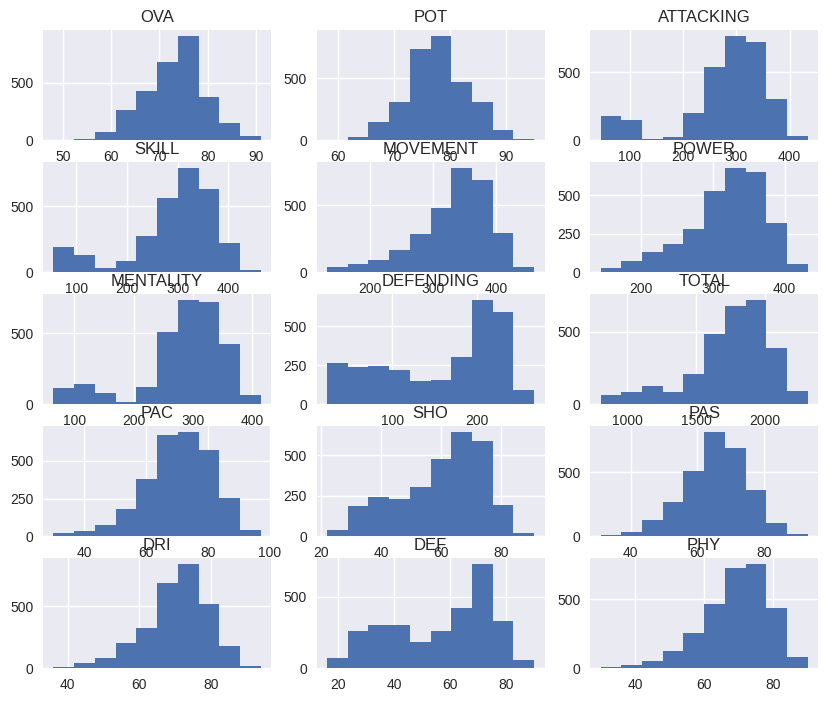

In [143]:
#zobaczmy jak rozlozone sa dane
plt.figure(figsize=(10, 10))
n=1
for col in sf_col:

  plt.subplot(6,3,n)
  n=n+1
  plt.hist(df[col])
  plt.title(col)

plt.show()

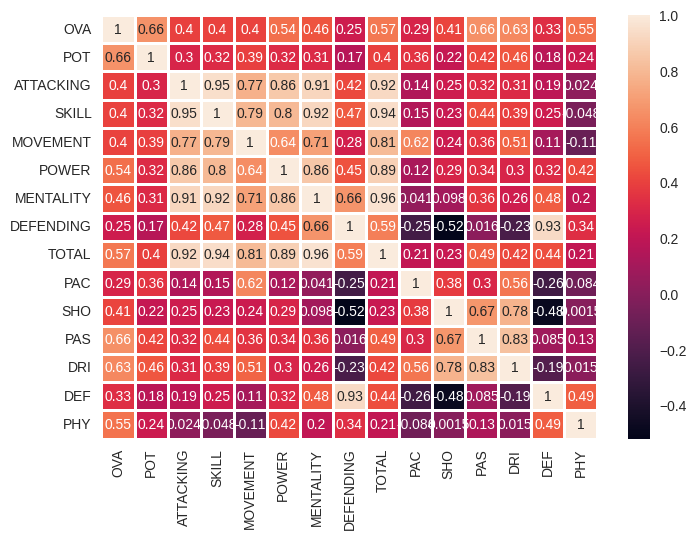

In [144]:
f, ax = plt.subplots()
sns.heatmap(df[sf_col].corr( method='pearson', min_periods=1),annot=True,linewidths=1)
plt.show()

In [145]:
df = df[df.wartosc_eur != 0]

In [147]:
df['wartosc_log'] = np.log(df['wartosc_eur'])

<ipython-input-147-f92a1fbf5f84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wartosc_log'] = np.log(df['wartosc_eur'])


In [148]:
for col in sf_col:
    print(("wspolczynnik korelacji pearsona pomiedzy " + col +
           " a cena wynosi {0[0]: .4f} oraz p-value {0[1]: .4f}."
           ).format(stats.pearsonr(df[-df[col].isna()][col],df[-df[col].isna()]["wartosc_log"])))


wspolczynnik korelacji pearsona pomiedzy OVA a cena wynosi  0.8010 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy POT a cena wynosi  0.7916 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy ATTACKING a cena wynosi  0.4582 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy SKILL a cena wynosi  0.4609 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy MOVEMENT a cena wynosi  0.4967 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy POWER a cena wynosi  0.5221 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy MENTALITY a cena wynosi  0.4853 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy DEFENDING a cena wynosi  0.2715 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy TOTAL a cena wynosi  0.5750 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy PAC a cena wynosi  0.3563 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy SHO a cena wynosi  0.2777 oraz p-value  

In [181]:
for col in sf_col:
    print(("wspolczynnik korelacji pearsona pomiedzy " + col +
           " a cena wynosi {0[0]: .4f} oraz p-value {0[1]: .4f}."
           ).format(stats.pearsonr(df[-df[col].isna()][col],df[-df[col].isna()]["wartosc_log"])))

0      14.73
1      16.71
2      17.22
3      14.91
4      16.71
        ... 
3121   14.91
3122   15.20
3123   14.40
3124   13.46
3125   13.30
Name: wartosc_log, Length: 2927, dtype: float64

In [180]:
df[-df[col].isna()][col]

0      78.00
1      75.00
2      82.00
3      76.00
4      79.00
        ... 
3121   79.00
3122   74.00
3123   78.00
3124   64.00
3125   69.00
Name: OVA, Length: 2927, dtype: float64

In [185]:
stats.pearsonr(df[-df[col].isna()][col],df[-df[col].isna()]['wartosc_log'])[0]**2

0.6415566934740654

In [182]:
for col in sf_col:
  print(("wspolczynnik korelacji pearsona pomiedzy " + col +
           " a cena wynosi {0[0]: .4f} oraz p-value {0[1]: .4f}."
        ).format(stats.pearsonr(df[-df[col].isna()][col],df[-df[col].isna()]['wartosc_log'])[0]**2))


TypeError: ignored

In [69]:
df = df[df.VALUE_EUR != 0]

In [152]:
df['wartosc_log_fifa'] = np.log(df['VALUE_EUR'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-152-38ebd0168147>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wartosc_log_fifa'] = np.log(df['VALUE_EUR'])


In [160]:
for col in sf_col:
    print(("wspolczynnik korelacji pearsona pomiedzy " + col +
           " a cena wynosi {0[0]: .4f} oraz p-value {0[1]: .4f}."
           ).format(stats.pearsonr(df[-df[col].isna()][col],df[-df[col].isna()]["wartosc_log_fifa"])))

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4446: RuntimeWarning: invalid value encountered in subtract
  ym = y.astype(dtype) - ymean


ValueError: ignored

In [90]:
np.isnan(df.OVA).any()

True

In [94]:
df[(df.OVA == 0) | (df.OVA.isna()) ]

,klub,pilkarz,pozycja,wzrost,dominujaca_noga,wartosc_eur,liga,wiek,OVA,POT,ATTACKING,SKILL,MOVEMENT,POWER,MENTALITY,DEFENDING,TOTAL,PAC,SHO,PAS,DRI,DEF,PHY,VALUE_EUR,SALARY_EUR,ws_minuty,ws_asysty,ws_skutecznosc_podan,ws_wygrane_pojedynki_na_mecz,ws_srednia_ocena,ws_bramki,ws_MotM,wystepy_lawka,ws_wystepy_poczatek,wystepy_suma,price_range,wartosc_log,wartosc_log_fifa
6,1.FSV Mainz 05,Aaron Martin,Lewy obrońca,180.00,lewonożny,"7,000,000.00",bundesliga,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,246.00",2,83.5,0.1,6.86,3,1,0.00,15.00,15.00,5-10,15.76,NaN
20,Real Betis Balompié,Abner,Lewy obrońca,181.00,lewonożny,"8,000,000.00",laliga,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5-10,15.89,NaN
40,Nottingham Forest,Adnan Kanuric,Bramkarz,194.00,prawonożny,"150,000.00",premier league,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2.5,11.92,NaN
48,RC Lens,Adrien Thomasson,Ofensywny pomocnik,177.00,prawonożny,"5,000,000.00",ligue 1,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5-5,15.42,NaN
59,US Sassuolo,Agustin Alvarez,Środkowy napastnik,177.00,prawonożny,"8,500,000.00",serie a,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5-10,15.96,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,FC Porto,Zaidu,Lewy obrońca,182.00,lewonożny,"10,000,000.00",liga nos,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5-10,16.12,NaN
3090,SC Braga,Ze Carlos,Prawy obrońca,177.00,prawonożny,"800,000.00",liga nos,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2.5,13.59,NaN
3091,FC Paços de Ferreira,Ze Oliveira,Bramkarz,186.00,prawonożny,"200,000.00",liga nos,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2.5,12.21,NaN
3097,Aston Villa,Alex Moreno,Lewy obrońca,179.00,lewonożny,"20,000,000.00",premier league,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10-20,16.81,NaN


In [87]:
df[df.wartosc_log == 0 | df.wartosc_log.isna() ]

,klub,pilkarz,pozycja,wzrost,dominujaca_noga,wartosc_eur,liga,wiek,OVA,POT,ATTACKING,SKILL,MOVEMENT,POWER,MENTALITY,DEFENDING,TOTAL,PAC,SHO,PAS,DRI,DEF,PHY,VALUE_EUR,SALARY_EUR,ws_minuty,ws_asysty,ws_skutecznosc_podan,ws_wygrane_pojedynki_na_mecz,ws_srednia_ocena,ws_bramki,ws_MotM,wystepy_lawka,ws_wystepy_poczatek,wystepy_suma,price_range,wartosc_log,wartosc_log_fifa


In [84]:
print(f"R2 = {stats.pearsonr(df['OVA'],df['wartosc_log'])[0]**2}")


ValueError: ignored

## df_test

In [153]:
df_test = df.copy()

In [154]:
df_test.dropna(inplace=True)

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 3125
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   klub                          2467 non-null   object  
 1   pilkarz                       2467 non-null   object  
 2   pozycja                       2467 non-null   object  
 3   wzrost                        2467 non-null   float64 
 4   dominujaca_noga               2467 non-null   object  
 5   wartosc_eur                   2467 non-null   float64 
 6   liga                          2467 non-null   object  
 7   wiek                          2467 non-null   int64   
 8   OVA                           2467 non-null   float64 
 9   POT                           2467 non-null   float64 
 10  ATTACKING                     2467 non-null   float64 
 11  SKILL                         2467 non-null   float64 
 12  MOVEMENT                      2467 non-null   fl

In [156]:
for col in sf_col:
    print(("wspolczynnik korelacji pearsona pomiedzy " + col +
           " a cena wynosi {0[0]: .4f} oraz p-value {0[1]: .4f}."
           ).format(stats.pearsonr(df_test[col],df_test["wartosc_log"])))

wspolczynnik korelacji pearsona pomiedzy OVA a cena wynosi  0.7683 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy POT a cena wynosi  0.7899 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy ATTACKING a cena wynosi  0.3288 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy SKILL a cena wynosi  0.3390 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy MOVEMENT a cena wynosi  0.3857 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy POWER a cena wynosi  0.3935 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy MENTALITY a cena wynosi  0.3622 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy DEFENDING a cena wynosi  0.1593 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy TOTAL a cena wynosi  0.4707 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy PAC a cena wynosi  0.3229 oraz p-value  0.0000.
wspolczynnik korelacji pearsona pomiedzy SHO a cena wynosi  0.2819 oraz p-value  

In [96]:
print(f"R2 = {stats.pearsonr(df_test['POT'],df_test['wartosc_log'])[0]**2}")


R2 = 0.6239403777971445


<ipython-input-49-67c5ebce5545>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_test.corr( method='pearson', min_periods=1),annot=True,linewidths=1)


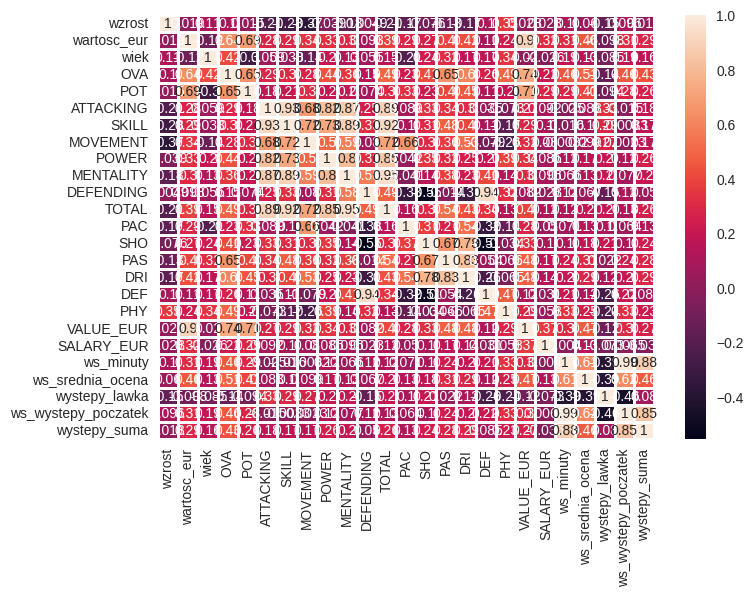

In [49]:
f, ax = plt.subplots()
sns.heatmap(df_test.corr( method='pearson', min_periods=1),annot=True,linewidths=1)
plt.show()

In [51]:
a = df_test.columns[df_test.dtypes == float]
a

Index(['wzrost', 'wartosc_eur', 'OVA', 'POT', 'ATTACKING', 'SKILL', 'MOVEMENT',
       'POWER', 'MENTALITY', 'DEFENDING', 'TOTAL', 'PAC', 'SHO', 'PAS', 'DRI',
       'DEF', 'PHY', 'VALUE_EUR', 'SALARY_EUR', 'ws_minuty',
       'ws_srednia_ocena', 'wystepy_lawka', 'ws_wystepy_poczatek',
       'wystepy_suma'],
      dtype='object')

In [52]:
b = ['wzrost', 'OVA', 'POT', 'ATTACKING', 'SKILL', 'MOVEMENT',
       'POWER', 'MENTALITY', 'DEFENDING', 'TOTAL', 'PAC', 'SHO', 'PAS', 'DRI',
       'DEF', 'PHY', 'ws_srednia_ocena',
       'ws_minuty', 'wystepy_lawka', 'ws_wystepy_poczatek', 'wystepy_suma']

In [53]:
ys = df_test.loc[:,'wartosc_eur']
Xs = df_test.loc[:, b]

In [54]:
ks = sm.OLS(ys, Xs, data=df_test)
ks_res = ks.fit()
ks_res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            wartosc_eur   R-squared (uncentered):                   0.602
Model:                            OLS   Adj. R-squared (uncentered):              0.599
Method:                 Least Squares   F-statistic:                              185.4
Date:                Wed, 28 Jun 2023   Prob (F-statistic):                        0.00
Time:                        16:43:40   Log-Likelihood:                         -43687.
No. Observations:                2467   AIC:                                  8.741e+04
Df Residuals:                    2447   BIC:                                  8.753e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
wzrost              -3.191e+05   2.07e+04    -15.392      0.000    -3.6e+05   -2.78e+05
OVA                  1.076e+06   9.89e+04     10.887      0.000    8.82e+05    1.27e+06
POT                  9.097e+05   6.74e+04     13.497      0.000    7.78e+05    1.04e+06
ATTACKING            1.173e+05   1.96e+04      5.978      0.000    7.88e+04    1.56e+05
SKILL                1.858e+05   2.24e+04      8.311      0.000    1.42e+05     2.3e+05
MOVEMENT             1.175e+05   2.62e+04      4.494      0.000    6.63e+04    1.69e+05
POWER                1.293e+05   2.58e+04      5.012      0.000    7.87e+04     1.8e+05
MENTALITY            1.858e+05   2.37e+04      7.828      0.000    1.39e+05    2.32e+05
DEFENDING            1.094e+05   2.91e+04      3.759      0.000    5.24e+04    1.67e+05
TOTAL                -1.98e+05    2.2e+04     -8.987      0.000   -2.41e+05   -1.55e+05
PAC                  2.681e+05   5.48e+04      4.889      0.000    1.61e+05    3.76e+05
SHO                  4.143e+05    6.7e+04      6.184      0.000    2.83e+05    5.46e+05
PAS                  1.908e+05   8.78e+04      2.174      0.030    1.87e+04    3.63e+05
DRI                  4.824e+04   8.69e+04      0.555      0.579   -1.22e+05    2.19e+05
DEF                  2.353e+05   9.63e+04      2.445      0.015    4.66e+04    4.24e+05
PHY                  2.216e+05   7.76e+04      2.858      0.004    6.95e+04    3.74e+05
ws_srednia_ocena    -9.566e+06   8.09e+05    -11.824      0.000   -1.12e+07   -7.98e+06
ws_minuty            2.235e+04   4264.691      5.241      0.000     1.4e+04    3.07e+04
wystepy_lawka       -1.867e+05   9.72e+04     -1.920      0.055   -3.77e+05    4013.606
ws_wystepy_poczatek -6.447e+05   2.24e+05     -2.876      0.004   -1.08e+06   -2.05e+05
wystepy_suma        -8.314e+05   1.52e+05     -5.469      0.000   -1.13e+06   -5.33e+05
==============================================================================
Omnibus:                     1645.693   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48065.367
Skew:                           2.715   Prob(JB):                         0.00
Kurtosis:                      23.931   Cond. No.                     4.00e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.91e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
#dodanie stałej do modelu
X = sm.add_constant(Xs)

In [56]:
ks = sm.OLS(ys, X)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            wartosc_eur   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     164.3
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:43:55   Log-Likelihood:                -43321.
No. Observations:                2467   AIC:                         8.668e+04
Df Residuals:                    2446   BIC:                         8.681e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -2.06e+08   7.08e+06    -29.083      0.000    -2.2e+08   -1.92e+08
wzrost               2.069e+04   2.14e+04      0.969      0.333   -2.12e+04    6.26e+04
OVA                  8.297e+05   8.57e+04      9.686      0.000    6.62e+05    9.98e+05
POT                  1.301e+06   5.97e+04     21.814      0.000    1.18e+06    1.42e+06
ATTACKING            2.295e+04   1.72e+04      1.332      0.183   -1.08e+04    5.67e+04
SKILL                 7.03e+04   1.97e+04      3.572      0.000    3.17e+04    1.09e+05
MOVEMENT             9.781e+04   2.26e+04      4.336      0.000    5.36e+04    1.42e+05
POWER                4.398e+04   2.24e+04      1.961      0.050      -1.071     8.8e+04
MENTALITY            6.631e+04   2.09e+04      3.176      0.002    2.54e+04    1.07e+05
DEFENDING            8.997e+04   2.51e+04      3.583      0.000    4.07e+04    1.39e+05
TOTAL               -7.113e+04   1.95e+04     -3.650      0.000   -1.09e+05   -3.29e+04
PAC                  4.172e+04   4.79e+04      0.871      0.384   -5.22e+04    1.36e+05
SHO                  2.101e+05   5.82e+04      3.611      0.000     9.6e+04    3.24e+05
PAS                  6.957e+04   7.58e+04      0.918      0.359   -7.91e+04    2.18e+05
DRI                 -6.652e+04    7.5e+04     -0.887      0.375   -2.14e+05    8.06e+04
DEF                 -1.034e+05   8.38e+04     -1.234      0.217   -2.68e+05    6.09e+04
PHY                  1.799e+05   6.69e+04      2.689      0.007    4.87e+04    3.11e+05
ws_srednia_ocena     7.079e+06   9.02e+05      7.845      0.000    5.31e+06    8.85e+06
ws_minuty            6162.6439   3718.844      1.657      0.098   -1129.764    1.35e+04
wystepy_lawka        2.308e+04   8.42e+04      0.274      0.784   -1.42e+05    1.88e+05
ws_wystepy_poczatek -3.204e+05   1.94e+05     -1.655      0.098      -7e+05    5.92e+04
wystepy_suma        -2.973e+05   1.32e+05     -2.247      0.025   -5.57e+05   -3.78e+04
==============================================================================
Omnibus:                     1601.950   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39743.154
Skew:                           2.667   Prob(JB):                         0.00
Kurtosis:                      21.926   Cond. No.                     2.82e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
df_test['wartosc_log'] = np.log(df_test['wartosc_eur'])


In [58]:
ys = df_test.loc[:,'wartosc_log']
Xs = df_test.loc[:, b]

In [59]:
#dodanie stałej do modelu
X = sm.add_constant(Xs)

In [60]:
ks = sm.OLS(ys, X, data=df_test)
ks_res = ks.fit()
ks_res.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            wartosc_log   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     426.5
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:44:12   Log-Likelihood:                -2546.8
No. Observations:                2467   AIC:                             5136.
Df Residuals:                    2446   BIC:                             5258.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.6670      0.470    -12.054      0.000      -6.589      -4.745
wzrost                  0.0083      0.001      5.836      0.000       0.005       0.011
OVA                     0.0887      0.006     15.608      0.000       0.078       0.100
POT                     0.1332      0.004     33.640      0.000       0.125       0.141
ATTACKING               0.0051      0.001      4.479      0.000       0.003       0.007
SKILL                   0.0036      0.001      2.735      0.006       0.001       0.006
MOVEMENT                0.0028      0.001      1.875      0.061      -0.000       0.006
POWER                   0.0066      0.001      4.410      0.000       0.004       0.009
MENTALITY               0.0043      0.001      3.119      0.002       0.002       0.007
DEFENDING               0.0040      0.002      2.396      0.017       0.001       0.007
TOTAL                  -0.0052      0.001     -4.037      0.000      -0.008      -0.003
PAC                     0.0140      0.003      4.402      0.000       0.008       0.020
SHO                    -0.0076      0.004     -1.976      0.048      -0.015    -5.7e-05
PAS                     0.0003      0.005      0.068      0.945      -0.010       0.010
DRI                     0.0354      0.005      7.117      0.000       0.026       0.045
DEF                     0.0055      0.006      0.983      0.326      -0.005       0.016
PHY                     0.0049      0.004      1.095      0.274      -0.004       0.014
ws_srednia_ocena        0.0218      0.060      0.364      0.716      -0.096       0.139
ws_minuty              -0.0005      0.000     -2.203      0.028      -0.001   -5.99e-05
wystepy_lawka           0.0001      0.006      0.026      0.979      -0.011       0.011
ws_wystepy_poczatek     0.0370      0.013      2.877      0.004       0.012       0.062
wystepy_suma            0.0371      0.009      4.224      0.000       0.020       0.054
==============================================================================
Omnibus:                       99.847   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.670
Skew:                          -0.449   Prob(JB):                     6.26e-27
Kurtosis:                       3.607   Cond. No.                     2.82e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
df_test

,klub,pilkarz,pozycja,wzrost,dominujaca_noga,wartosc_eur,liga,wiek,OVA,POT,ATTACKING,SKILL,MOVEMENT,POWER,MENTALITY,DEFENDING,TOTAL,PAC,SHO,PAS,DRI,DEF,PHY,VALUE_EUR,SALARY_EUR,ws_bramki,ws_skutecznosc_podan,ws_minuty,ws_MotM,ws_wygrane_pojedynki_na_mecz,ws_srednia_ocena,ws_asysty,wystepy_lawka,ws_wystepy_poczatek,wystepy_suma,price_range,wartosc_log
0,West Ham United,Aaron Cresswell,Lewy obrońca,170.00,lewonożny,"2,500,000.00",premier league,33,78.00,78.00,330.00,378.00,350.00,357.00,337.00,235.00,"2,038.00",64.00,60.00,75.00,75.00,77.00,68.00,"9,500,000.00","60,000.00",-,83.2,"1,534.00",-,1.3,6.66,-,1.00,17.00,18.00,0-2.5,14.73
1,FC Brentford,Aaron Hickey,Lewy obrońca,185.00,obunożny,"18,000,000.00",premier league,20,75.00,82.00,311.00,320.00,361.00,321.00,288.00,217.00,"1,871.00",77.00,55.00,69.00,73.00,70.00,58.00,"10,500,000.00","28,000.00",-,83.1,684.00,-,0.4,6.51,-,1.00,8.00,9.00,10-20,16.71
2,FC Arsenal,Aaron Ramsdale,Bramkarz,190.00,prawonożny,"30,000,000.00",premier league,24,82.00,86.00,114.00,140.00,279.00,239.00,166.00,51.00,"1,396.00",83.00,77.00,85.00,84.00,48.00,78.00,"34,500,000.00","62,000.00",-,60.2,"1,620.00",1,0.2,6.80,-,0.00,18.00,18.00,20-40,17.22
3,OGC Nice,Aaron Ramsey,Środkowy pomocnik,178.00,prawonożny,"3,000,000.00",ligue 1,32,76.00,76.00,349.00,390.00,321.00,333.00,359.00,200.00,"1,992.00",51.00,71.00,78.00,79.00,65.00,62.00,"6,000,000.00","38,000.00",1,88.2,710.00,1,0.2,6.74,1,7.00,7.00,14.00,2.5-5,14.91
4,Manchester United,Aaron Wan-Bissaka,Prawy obrońca,183.00,prawonożny,"18,000,000.00",premier league,25,79.00,82.00,277.00,315.00,385.00,321.00,327.00,245.00,"1,909.00",82.00,50.00,65.00,73.00,77.00,70.00,"22,000,000.00","86,000.00",-,79.4,433.00,-,0.2,6.95,-,1.00,5.00,6.00,10-20,16.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,Celta de Vigo,Oscar Rodriguez,Ofensywny pomocnik,174.00,prawonożny,"10,000,000.00",laliga,24,63.00,80.00,256.00,281.00,294.00,267.00,263.00,94.00,"1,498.00",64.00,52.00,61.00,64.00,33.00,54.00,"1,200,000.00","3,000.00",2,84.8,"1,105.00",-,0.5,6.63,-,3.00,13.00,16.00,5-10,16.12
3121,Rayo Vallecano,Oscar Trejo,Ofensywny pomocnik,180.00,prawonożny,"3,000,000.00",laliga,34,79.00,79.00,367.00,384.00,382.00,384.00,377.00,215.00,"2,171.00",68.00,76.00,78.00,82.00,71.00,77.00,"8,000,000.00","25,000.00",2,84.6,"1,004.00",-,0.4,6.67,2,2.00,13.00,15.00,2.5-5,14.91
3122,Rayo Vallecano,Oscar Valentin,Środkowy pomocnik,177.00,prawonożny,"4,000,000.00",laliga,28,74.00,75.00,250.00,276.00,323.00,355.00,320.00,222.00,"1,796.00",63.00,45.00,65.00,63.00,72.00,75.00,"4,300,000.00","16,000.00",-,83.4,"1,140.00",-,0.9,6.71,-,3.00,13.00,16.00,2.5-5,15.20
3123,Athletic Bilbao,Oscar de Marcos,Prawy obrońca,182.00,prawonożny,"1,800,000.00",laliga,33,78.00,78.00,333.00,348.00,388.00,361.00,352.00,224.00,"2,057.00",80.00,64.00,74.00,74.00,73.00,76.00,"7,500,000.00","26,000.00",-,79.7,"1,349.00",-,0.8,6.74,3,1.00,16.00,17.00,0-2.5,14.40


In [ ]:
#split data train
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=0)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.7802373105214269

In [ ]:
y_train_price = lm.predict(X_train)

In [ ]:
y_pred_test = lm.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7802373105214269

In [ ]:
y_pred = lm.predict(Xs)

In [ ]:
actual = np.exp(ys)
pred = np.exp(y_pred)
pred_y_df = pd.DataFrame({'Actual Value':actual, 'Predicted_value':pred, 'Diff': actual-pred})
pred_y_df['nazwa'] = df_test['pilkarz']
pred_y_df['klub'] = df_test['klub']

In [ ]:
pred_y_df.sort_values(by='Diff', ascending=False).head(10)

,Actual Value,Predicted_value,Diff,nazwa,klub
963,"90,000,000.00","32,654,975.75","57,345,024.25",Gavi,FC Barcelona
1190,"70,000,000.00","28,578,791.60","41,421,208.40",Jack Grealish,Manchester City
1937,"75,000,000.00","33,830,076.15","41,169,923.85",Mason Mount,Chelsea FC
2555,"80,000,000.00","39,087,356.28","40,912,643.72",Rodrygo,Real Madryt
1748,"75,000,000.00","34,472,377.80","40,527,622.20",Luis Diaz,FC Liverpool
1662,"70,000,000.00","30,457,781.11","39,542,218.89",Leroy Sane,Bayern Monachium
402,"75,000,000.00","36,602,428.16","38,397,571.84",Bruno Fernandes,Manchester United
2692,"65,000,000.00","29,949,778.64","35,050,221.36",Serge Gnabry,Bayern Monachium
256,"75,000,000.00","40,191,394.21","34,808,605.79",Antony,Manchester United
2451,"70,000,000.00","35,202,556.61","34,797,443.39",Raheem Sterling,Chelsea FC


In [ ]:
pred_y_df.sort_values(by='Diff', ascending=True).head(10)

,Actual Value,Predicted_value,Diff,nazwa,klub
1619,"180,000,000.00","368,549,569.48","-188,549,569.48",Kylian Mbappe,FC Paris Saint-Germain
1521,"35,000,000.00","147,548,945.14","-112,548,945.14",Karim Benzema,Real Madryt
2518,"45,000,000.00","153,926,953.94","-108,926,953.94",Robert Lewandowski,FC Barcelona
930,"50,000,000.00","144,234,632.98","-94,234,632.98",Frenkie de Jong,FC Barcelona
1678,"50,000,000.00","140,045,811.16","-90,045,811.16",Lionel Messi,FC Paris Saint-Germain
797,"170,000,000.00","238,846,777.89","-68,846,777.89",Erling Haaland,Manchester City
1556,"80,000,000.00","146,603,067.78","-66,603,067.78",Kevin De Bruyne,Manchester City
2959,"50,000,000.00","112,435,887.38","-62,435,887.38",Virgil van Dijk,FC Liverpool
1763,"10,000,000.00","68,606,814.74","-58,606,814.74",Luka Modric,Real Madryt
2108,"80,000,000.00","127,203,152.06","-47,203,152.06",Mohamed Salah,FC Liverpool
